In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.stats import norm, beta

import sys
sys.path.append('../')
from pyEM.fitting import EMfit
from pyEM.math import norm2beta, norm2alpha, alpha2norm, beta2norm
from pyEM import plotting
from pyEM.classes import EMModel
import rw_models

In [3]:
param_names = ['beta', 'lr']
betamin, betamax   = .75,  10
alphamin, alphamax = .05, .95

nsubjects = 150
sim_params = np.ones((nsubjects, 2))
for simS in range(nsubjects):
    # For beta, we will sample from a normal distribution and then transform
    sim_params[simS, 0] = norm.rvs(0, scale=1)
    while sim_params[simS, 0] > betamax or sim_params[simS, 0] < betamin:
        sim_params[simS, 0] = norm2beta(norm.rvs(0, scale=1))

    # For alpha, we will sample from a beta distribution and then transform
    sim_params[simS, 1] = beta.rvs(1.1, 1.1)
    while sim_params[simS, 1] > alphamax or sim_params[simS, 1] < alphamin:
        sim_params[simS, 1] = beta.rvs(1.1, 1.1)

In [4]:
# simulate behavior and create a list of lists with choices/rewards per subject
subj_dict = rw_models.simulate(params=sim_params, nblocks=6, ntrials=24)

all_data = []
for idx, (choices, rewards) in enumerate(zip(subj_dict['choices'], subj_dict['rewards'])):
    all_data += [[choices, rewards]]

In [5]:
# Initialize the model class
RWModel = EMModel(all_data=all_data,
                  objfunc=rw_models.fit,
                  param_names=param_names)

# Fit the model
RWModel.EMfit(mstep_maxit=100)

11017.263 (000), 9579.039 (001), 9513.328 (002), 9500.393 (003), 9495.740 (004), 9493.552 (005), 9492.323 (006), 9491.726 (007), 9491.328 (008), 9491.083 (009), 9491.019 (010), 9490.876 (011), 9490.790 (012), 9490.786 (014), 9490.754 (015), 9490.743 (019), 9490.684 (020), 9490.574 (025), -MAXIMUM NUMBER OF ITERATIONS REACHED



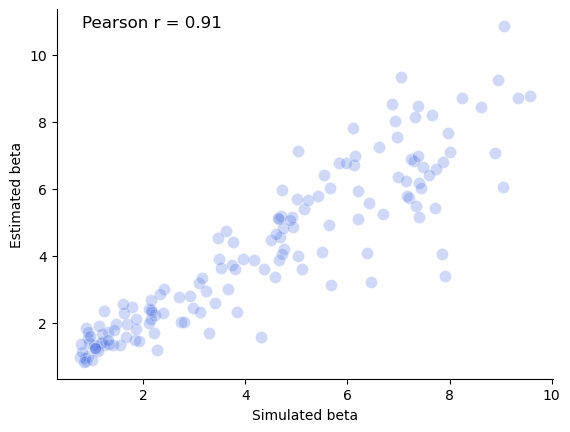

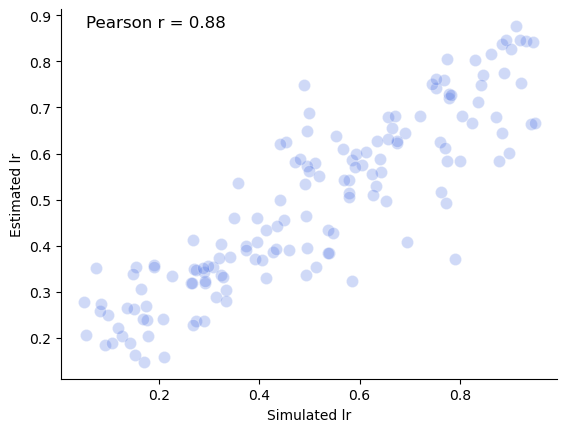

In [6]:
# Get subject-wise model fit information
RWModel.get_fits()

# Plot the parameter recovery
for param_idx, param_label in enumerate(RWModel.param_names):
    simulated_param = sim_params[:,param_idx]
    fitted_params = RWModel.est_params[:,param_idx]
    plotting.plot_scatter(simulated_param, f'Simulated {param_label}', 
                          fitted_params, f'Estimated {param_label}')

In [7]:
# Calculate BIC
RWModel.calc_BICint(nll_output='CHOICE_NLL')
print(f'Integrated BIC: {RWModel.BICint}')

Integrated BIC: 19048.470358746403


In [8]:
# Calculate LME
RWModel.calc_LME()
print(f'LME: {RWModel.LME}')

Good Hessians: 150 out of 150
LME: -9540.492115105415
